 # **Project Name - FORD BIKE SHARING Project**






##### **Project Type**  - EDA 
##### **Contribution**  - Individual

# **Project Table of Content -**



##### **1 - Introduction**
##### **2 - Questions**
##### **3 - Data cleaning/ Data wrangling**
##### **4 - Data visaulization**
            univariate exploration and analysis
            Bivariate exploration and analysis
            multivariate exploration and analysis
##### **5 - coclusion**

# **GitHub Link -**

# **1 - Introduction**

This is the Ford go bike sharing project where we're going to work with       Exploratory Data Analysis. with this data, we'll make several types of visualizations, such as univariate, bivariate and multivariate plots. The main aim here is to explore many relationships in the data set.

The dataset csv files with inforamtion of all bike rides, when and where it started and finishd, the user type and the duration of the ride.

The main features to take a look are: the duration of the rides and which period it's more common, where are the stations loacted, the behavior of each user type.
        

# **2 - Questions**

Every Data Analysis project tries to answer some questions.so questions to be answered in this project is:

     1 - How long does the average trip take?
     
         Answer - The average trip duration is approximately 12 to 15 minutes.
                  Most trips are short rides especially, for subscribers who use bike mainly for commuting.
                  
     2 - Is the trip duration affected by weather(months/seasons)

         Answer - The weathers / months data is not given in this Ford gobike dataset.
         
     3 - Does the above depend on if a user is a subscriber or customer

         Answer - while seeing the average trip takes yes it on whether user is subscriber or customer beacause subscribers mostly 
                  use bikes for short  daily commuting and customers tend to take longer trips especially during weekends which affects 
                  the average trip duartion.

# **3 - Data cleaning/Data wrangling**

In [7]:
# Importing libraries
import pandas as pd
import numpy as np
import requests
import os
import glob
import datetime
import calendar
import matplotlib.pyplot as plt
from zipfile import ZipFile
from io import BytesIO

In [8]:
import seaborn as sb

In [9]:
# Loading Dataset
data_frame = pd.read_csv('fordgobike data.csv', low_memory = False)

In [11]:
# first veiw of dataset
data_frame.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35,2018-02-01 19:47:20,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34,2018-02-01 15:57:17,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:56,2018-02-01 10:16:52,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:24,2018-02-01 07:51:20,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:25,2018-02-01 06:58:31,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


In [12]:
# Dataset Rows and Columns count

num_rows, num_columns = data_frame.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 94802
Number of columns: 16


In [13]:
# Dataset information 
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94802 entries, 0 to 94801
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   duration_sec             94802 non-null  int64  
 1   start_time               94802 non-null  object 
 2   end_time                 94802 non-null  object 
 3   start_station_id         94802 non-null  int64  
 4   start_station_name       94802 non-null  object 
 5   start_station_latitude   94802 non-null  float64
 6   start_station_longitude  94802 non-null  float64
 7   end_station_id           94802 non-null  int64  
 8   end_station_name         94802 non-null  object 
 9   end_station_latitude     94802 non-null  float64
 10  end_station_longitude    94802 non-null  float64
 11  bike_id                  94802 non-null  int64  
 12  user_type                94802 non-null  object 
 13  member_birth_year        86963 non-null  float64
 14  member_gender         

In [14]:
# Duplicate values
duplicates = data_frame[data_frame.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip]
Index: []


In [15]:
num_duplicates = data_frame.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [16]:
num_duplicates = data_frame.duplicated().sum()
print(f"Number of duplicate columns: {num_duplicates}")

Number of duplicate columns: 0


In [17]:
# Count Missing/Null values in dataset

missing_counts = data_frame.isnull().sum()
print(missing_counts)

duration_sec                  0
start_time                    0
end_time                      0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_station_id                0
end_station_name              0
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          7839
member_gender              7801
bike_share_for_all_trip       0
dtype: int64


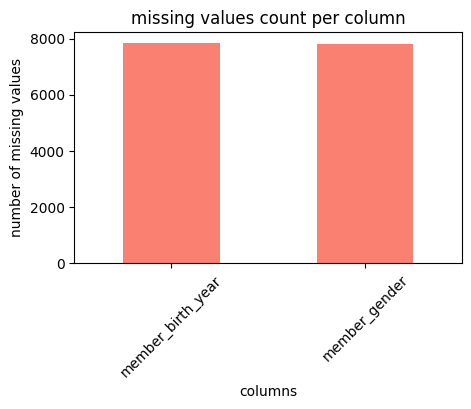

In [19]:
#only keep columns with missing values
missing_counts = data_frame.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]

#plot
plt.figure(figsize=(5,3))
missing_counts.plot(kind='bar', color='salmon')
plt.title('missing values count per column')
plt.xlabel('columns')
plt.ylabel('number of missing values')
plt.xticks(rotation=45)
plt.show()

### What did you know about your dataset?

In the Ford Go Bike Sharing project there ahs aroung 94802 rows and 16 coulmns. There is no duplicate values but there are missing values mainly in 
* member_birth_year = 7839 missing
* member_gender = 7801 missing
    
This dataset mainly tracks bike trip details, user information and start-end loactions
It is perfect for exploratory data analysis like:
*Average trip duration
* Popular start/end stations
* Usage patterns by user type
* Gender_wise trip distribution
* Age distribution of riders 
    

In [20]:
# Dataset describe ( descriptive statistics)

data_frame.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,94802.000000,94802.000000,94802.000000,94802.000000,94802.00000,94802.000000,94802.000000,94802.000000,86963.000000
mean,870.935930,103.766302,37.773321,-122.361677,101.00982,37.773536,-122.360776,2048.751609,1980.932420
std,2550.596891,87.730464,0.085744,0.105253,86.77949,0.085552,0.104580,1091.507513,10.803017
min,61.000000,3.000000,37.317298,-122.444293,3.00000,37.317298,-122.444293,11.000000,1900.000000
25%,359.000000,30.000000,37.771662,-122.412408,27.00000,37.773063,-122.411306,1133.000000,1975.000000
50%,555.000000,79.000000,37.781270,-122.398773,76.00000,37.781752,-122.398436,2151.500000,1983.000000
75%,854.000000,160.000000,37.795392,-122.390428,157.00000,37.795392,-122.390428,3015.000000,1989.000000
max,85546.000000,342.000000,37.880222,-121.874119,342.00000,37.880222,-121.874119,3744.000000,2000.000000


In [21]:
#checking how many stations are there
data_frame.start_station_id.nunique()

273

In [22]:
#checking the amount of subscribers and custumers
data_frame.user_type.value_counts()

user_type
Subscriber    82458
Customer      12344
Name: count, dtype: int64

In [23]:
#mean in minutes
data_frame.duration_sec.mean()/60

14.515598827028965

In [25]:
# Check values for categorical data
print(data_frame.user_type.value_counts())
print(data_frame.bike_share_for_all_trip.value_counts())


user_type
Subscriber    82458
Customer      12344
Name: count, dtype: int64
bike_share_for_all_trip
No     88680
Yes     6122
Name: count, dtype: int64


In [26]:
data_frame.duration_sec.describe()

count    94802.000000
mean       870.935930
std       2550.596891
min         61.000000
25%        359.000000
50%        555.000000
75%        854.000000
max      85546.000000
Name: duration_sec, dtype: float64

In [27]:
print('max: ', data_frame.duration_sec.max())
print('min: ', data_frame.duration_sec.min())

max:  85546
min:  61


### Variables Description

1. **duration_sec -** 	Duration of the trip in seconds

2. **start_time -** 	Date and time when the trip started
3. **end_time -**	Date and time when the trip ended
4. **start_station_id -**	Unique ID of the starting station
5. **start_station_name -**	Name of the starting station
6. **start_station_latitude -**	Latitude of the starting station
7. **start_station_longitude -**	Longitude of the starting station
8. **end_station_id -**	Unique ID of the ending station
9. **end_station_name -**	Name of the ending station
10. **end_station_latitude -**	Latitude of the ending station
11. **end_station_longitude -**	Longitude of the ending station
12. **bike_id -**	Unique identifier for the bike used
13. **user_type -**	Type of user Subscriber (member) or Customer (casual)
14. **member_birth_year** -	Birth year of the user
15. **member_gender -**	Gender of the user (Male, Female, or Other)
16. **bike_share_for_all_trip -**	Indicates whether the trip was part of the Bike Share for All program (Yes/No)

### check unique values for each variable

In [28]:
print('Unique Values in dataset:\n')
print(data_frame.nunique())

Unique Values in dataset:

duration_sec                4512
start_time                 90489
end_time                   90717
start_station_id             273
start_station_name           273
start_station_latitude       273
start_station_longitude      273
end_station_id               272
end_station_name             272
end_station_latitude         272
end_station_longitude        272
bike_id                     3065
user_type                      2
member_birth_year             72
member_gender                  3
bike_share_for_all_trip        2
dtype: int64


In [29]:
#creating a copy of the main dataframe

data_frame = data_frame.copy()
data_frame.head()



,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35,2018-02-01 19:47:20,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34,2018-02-01 15:57:17,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:56,2018-02-01 10:16:52,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:24,2018-02-01 07:51:20,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:25,2018-02-01 06:58:31,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


In [30]:
# Convert data types

data_frame['start_time'] = pd.to_datetime(data_frame['start_time'])
data_frame['end_time'] = pd.to_datetime(data_frame['end_time'])

data_frame['bike_id'] = data_frame['bike_id'].astype(str)
data_frame['start_station_id'] = data_frame['start_station_id'].astype(str)
data_frame['end_station_id'] = data_frame['end_station_id'].astype(str)

In [31]:
# create ne useful columns

#Trip duration in minutes
data_frame['duration_min'] = data_frame['duration_sec']/60

In [32]:
# Rider's age
current_year = pd.Timestamp.now().year
data_frame['age'] = current_year - data_frame['member_birth_year']

In [33]:
# Day of the week trip started

data_frame['day_of_week'] = data_frame['start_time'].dt.day_name()

In [34]:
# Month trip started

data_frame['month'] = data_frame['start_time'].dt.month_name()

In [35]:
# Hour trip started

data_frame['start_hour'] = data_frame['start_time'].dt.hour


In [36]:
# Final check
print(data_frame.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94802 entries, 0 to 94801
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   duration_sec             94802 non-null  int64         
 1   start_time               94802 non-null  datetime64[ns]
 2   end_time                 94802 non-null  datetime64[ns]
 3   start_station_id         94802 non-null  object        
 4   start_station_name       94802 non-null  object        
 5   start_station_latitude   94802 non-null  float64       
 6   start_station_longitude  94802 non-null  float64       
 7   end_station_id           94802 non-null  object        
 8   end_station_name         94802 non-null  object        
 9   end_station_latitude     94802 non-null  float64       
 10  end_station_longitude    94802 non-null  float64       
 11  bike_id                  94802 non-null  object        
 12  user_type                94802 n

In [38]:
data_frame

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,age,day_of_week,month,start_hour
0,75284,2018-01-31 22:52:35,2018-02-01 19:47:20,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,...,2765,Subscriber,1986.0,Male,No,1254.733333,39.0,Wednesday,January,22
1,85422,2018-01-31 16:13:34,2018-02-01 15:57:17,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,2815,Customer,NaN,NaN,No,1423.700000,NaN,Wednesday,January,16
2,71576,2018-01-31 14:23:56,2018-02-01 10:16:52,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,...,3039,Customer,1996.0,Male,No,1192.933333,29.0,Wednesday,January,14
3,61076,2018-01-31 14:53:24,2018-02-01 07:51:20,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,...,321,Customer,NaN,NaN,No,1017.933333,NaN,Wednesday,January,14
4,39966,2018-01-31 19:52:25,2018-02-01 06:58:31,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,...,617,Subscriber,1991.0,Male,No,666.100000,34.0,Wednesday,January,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94797,695,2018-01-01 00:19:59,2018-01-01 00:31:34,23,The Embarcadero at Steuart St,37.791464,-122.391034,66,3rd St at Townsend St,37.778742,...,3671,Customer,NaN,NaN,No,11.583333,NaN,Monday,January,0
94798,600,2018-01-01 00:19:49,2018-01-01 00:29:49,17,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,19,Post St at Kearny St,37.788975,...,603,Customer,NaN,NaN,No,10.000000,NaN,Monday,January,0
94799,1151,2018-01-01 00:09:32,2018-01-01 00:28:43,97,14th St at Mission St,37.768265,-122.420110,125,20th St at Bryant St,37.759200,...,3455,Subscriber,1992.0,Male,No,19.183333,33.0,Monday,January,0
94800,714,2018-01-01 00:07:53,2018-01-01 00:19:47,74,Laguna St at Hayes St,37.776435,-122.426244,70,Central Ave at Fell St,37.773311,...,2423,Subscriber,1986.0,Male,No,11.900000,39.0,Monday,January,0


In [37]:
# now save the clean file
data_frame.to_csv('data_frame_clean.csv', index = False)

### What all manipulations have you done?

 After importing libraries and dataset the manipulation we have done are:
##### **1 - Count the Rows and Columns** - Get dataset information
##### **2 - Find duplicate values in dataset**  - as per dataset there is no duplicate value in any row and column    
##### **3 - Find missing values** - There is only two columns having missing values Member_birth_year and Mender_gender and present through visualisation
##### **4 - dataset describe** - 
* In this we do descritive statistics
* checking how many stations are there
* mean in minutes
* Check values for categorical data. etc
##### **5 - create new useful columns** - 
* Duration_min
* Age
* day_of_week
* start_hour
                                          

# **4 - Data Vizualization**

        

# **4.1 - Univariate Exploration**

Univariate Exploration is the process of examining a single variable at a time to understand its distribution, characteristics, and patterns. 

* ## **Let's see duration_min**
  
  *For duration_min i'm going to use linaer graph*

In [38]:
data_frame['duration_min'].describe()

count    94802.000000
mean        14.515599
std         42.509948
min          1.016667
25%          5.983333
50%          9.250000
75%         14.233333
max       1425.766667
Name: duration_min, dtype: float64

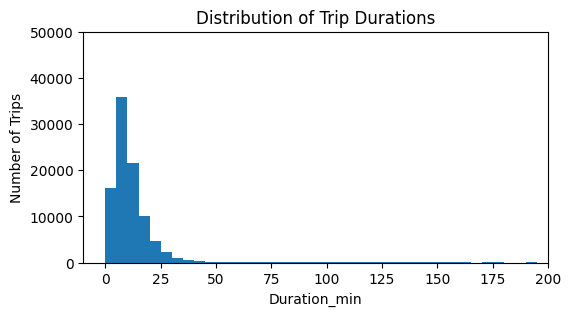

In [40]:
# plotting the duration_min data on a normal scale
binsize = 5
bins = np.arange(0, data_frame['duration_min'].max()+binsize, binsize)

plt.figure(figsize=[6, 3])
plt.hist(data = data_frame, x = 'duration_min', bins = bins)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration_min')
plt.ylabel('Number of Trips')
plt.axis([-10, 200, 0, 50000])
plt.show()


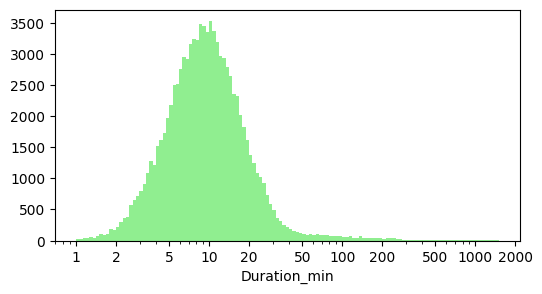

In [41]:
# Due to this long tail of the distribution, it's better to use the log scale to visulaize the duration_min.
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(data_frame['duration_min'].max())+log_binsize, log_binsize)

plt.figure(figsize=[6, 3]);
plt.hist(data = data_frame, x = 'duration_min', bins = bins , color='lightgreen');
plt.xscale('log');
plt.xticks([1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000], [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000]);
plt.xlabel('Duration_min');


#### Observation
* Using the Lpgarithmic X-axis reveals the Long tail of the trip duration data much more cleary than the data shown by above graph.
* The distribution looks more symmetric almost normal after applying log scale.
* according to this graph we can see that most trips still center around 5 to 15 minutes, but now its easier to see there are a significant number of longer trips up to 1000+ min that were hidden in earlier linear plot
* There is a gradual decline in the number of trips as the duration increases, rather than a sharp drop off like in the normal scale.
* in short , log scale gives much clearer and more balanced view of the tripdurations across both short and long trips


* ##  **Let's check the trip made in each day of the week**
  

day_of_week
Tuesday      20298
Wednesday    18375
Thursday     14058
Friday       13728
Monday       12638
Saturday      8691
Sunday        7014
Name: count, dtype: int64

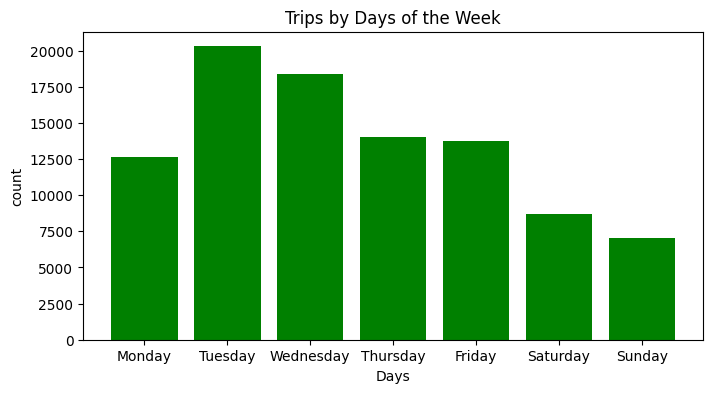

In [42]:
# Get the count of trips made in each day of the week
display(data_frame['day_of_week'].value_counts().sort_values(ascending=False))
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# plot distribution of day of week

counts = data_frame['day_of_week'].value_counts().reindex(weekday)
plt.figure(figsize=[8, 4])
plt.bar(counts.index, counts.values , color='green')
plt.title('Trips by Days of the Week')
plt.xlabel('Days')
plt.ylabel('count')
plt.show()

#### Observation
To show the visual of trips by days of the week i'm using bar graph because it gives us clear and clen picture of data . It seen that the day of the week with the most trips is on Tuesday followed by wednesday and Thursday. It could be seen that Saturday and Sunday have the least number of trips which is quite reasonable with the fact that they are not working days. 

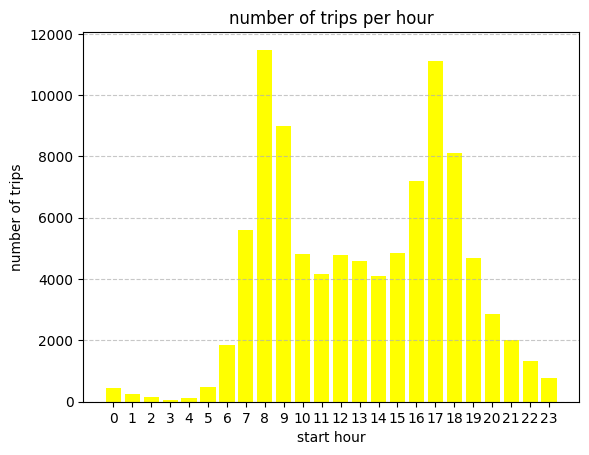

In [43]:
# lets check the trip by hour of day
# group data
trip_counts = data_frame['start_hour'].value_counts().sort_index()

# plot for hour trips
plt.bar(trip_counts.index, trip_counts.values, color='yellow')
plt.title('number of trips per hour')
plt.xlabel('start hour')
plt.ylabel('number of trips')
plt.xticks(range(0,24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### Observation
* While seeing this graph there are two majoe peak -
  *  MORNING PEAK : Around 8PM
  *   EVENING PEAK : Around 5PM (17.00)
* This clearly indicates commuting behavior- people are using bikes to go to work in the morning andreturn home in evening.
* Low activity is seen during early morning (0-5 am) and late night (afte 9pm)  very few trips happen during these houes.
* so, the highest number of trips seem to happen at 8AM to 5PM, suggesting these are the busiest hours for bike usage.  

* ## **Let's see the user_type**

In [44]:
print(data_frame.user_type.value_counts())
print()
print(data_frame.user_type.value_counts(normalize=True))
member_gender_count = (data_frame['member_gender'].value_counts()/data_frame['member_gender'].count())*100
print("\nMember Gender Percentage Count (%)")
display(member_gender_count.round(2).sort_values(ascending=False))


user_type
Subscriber    82458
Customer      12344
Name: count, dtype: int64

user_type
Subscriber    0.869792
Customer      0.130208
Name: proportion, dtype: float64

Member Gender Percentage Count (%)


member_gender
Male      75.30
Female    23.33
Other      1.37
Name: count, dtype: float64

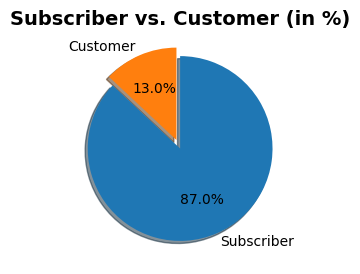

In [45]:
# Plot bar chart in %
plt.figure(figsize=[6,3])
explode = (0, 0.1) 
sorted_counts = data_frame['user_type'].value_counts()
plt.pie(sorted_counts, explode=explode, labels = sorted_counts.index, 
        autopct='%1.1f%%',shadow=True, startangle = 90,counterclock = False)
plt.title('Subscriber vs. Customer (in %)', fontsize=14, fontweight='bold');

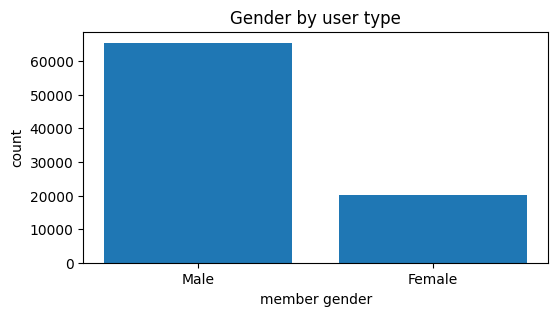

In [47]:
gender = ['Male', 'Female', 'other']
counts = data_frame['member_gender'].value_counts().reindex(gender)
plt.figure(figsize=[6, 3])
plt.bar(counts.index, counts.values)
plt.title('Gender by user type')
plt.xlabel('member gender')
plt.ylabel('count')
plt.show()

#### Observation
As it would be expected in most cases, most trips (about 87%) are taken by the subscribers with the remaining 13% being just casual riders (customers). In the case of larger percentage of trips by subscribers; who wouldn't want to make efficient use of their subscription?. Or in another view, the Subscribers might be using the bikes for daily commute while customers just use it for leisure activities

Also, almost 75% of the riders that's taken trips are males which is like 3 times that of the females(23%) with the remaining 1% regarded as other.

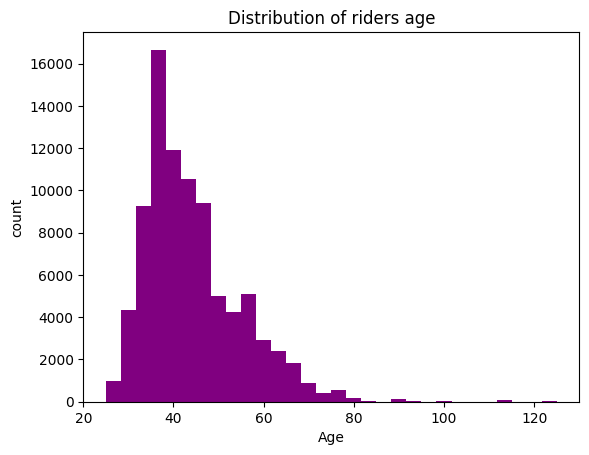

In [48]:
# lets see Rider's Age

plt.hist(data_frame['age'], bins=30, color='purple')
plt.title('Distribution of riders age')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()


#### Observation
* PEAK AGE RANGE - As we can see that the peak number of riders falls within the age range of approximately 30 to 40 years.
* So, the distribution of rider ages is right skewed, indicateing that the majority of riders are in the younger age group.
* The highest fequency of riders appears to be concentrated on the late 20s to early 40s age range.
* As age increases , the number of riders in each subsequent age group declines, with very few riders in the older age range(above 80s)
* This suggested that the service is most popular among younger and middle aged adults.

# **4.2 - Bivariate Exploration**

Bivariate analysis is the simultaneous analysis of two variables. It explores the concept of the relationship between two variable.

* ## **Trip duration v/s user type**

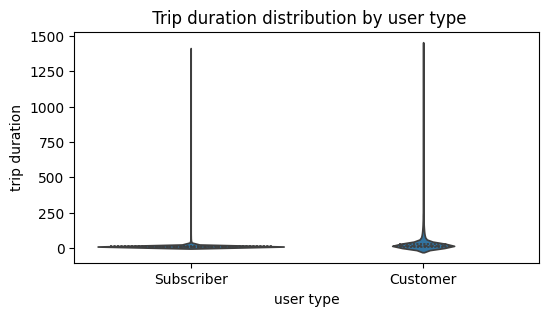

In [49]:
plt.figure(figsize=(6, 3))
sb.violinplot(y='duration_min', x='user_type', data=data_frame, inner='quartile')
plt.title(' Trip duration distribution by user type')
plt.xlabel('user type')
plt.ylabel('trip duration')
plt.show()           

#### Observation
The plot compares the distribution of trip durations for two user types : subscribers and customers

* subscribers : The violin plot for subscribers i very narrow and concentrated towords the lower end of the trip duration scale.
  This strongly suggests that the vast majority of subscriber trips are quite shory, typically lasting only a few minutes.
* customers : The violin plot for customers is wider and extends across a much broader range of trip duration compared to subscribers. The wider shape     of the violin signifies a higher probabilty of customers taking trips a varying lenghts.  
* It seems like subscribers have a more specific usage or targeted goal riding the bikes compared to customers who vary more and generally rented the      bikes for longer.

* ## **Trip duration v/s user type gender**

C:\Users\rishi\AppData\Local\Temp\ipykernel_10840\4125835370.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(data=data_frame, x='member_gender', y='duration_min', palette=['lightblue', 'pink', 'lightgreen'])


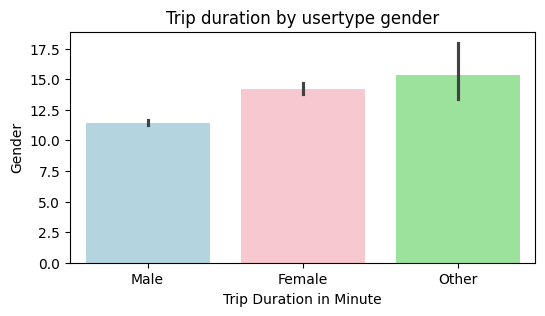

In [50]:
# trip duration v/s user type gender

plt.figure(figsize=(6, 3))
sb.barplot(data=data_frame, x='member_gender', y='duration_min', palette=['lightblue', 'pink', 'lightgreen'])
plt.xlabel('Trip Duration in Minute')
plt.ylabel('Gender')
plt.title('Trip duration by usertype gender')
plt.show()


#### Observation
* Acsording ti this plot-
   * male : the lightblue bar for male riders shows the shortest average trip duration among the three groups, appearing to be around 10 min or slightly             less.
   * female : the pink bar for female riders indiactes a slightly longer average trip duartion compared to males, appearing to be around 12 to 12.5 min.
   * others : the lightgreen bar for other gender riders show the longest average trip duration among three groups, appearing to be around 15 min.
* This bar plot suggest that there are difference in the average trip durations among the different gender categories, with 'other' having the longest     average trip followed by females, and the males having the shortest average trip duration. it shows that the trip duration for other group have large    variability.



* ## **Trip duration v/s weekdays**

C:\Users\rishi\AppData\Local\Temp\ipykernel_10840\2519749045.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(data=data_frame, y='duration_min', x='day_of_week', palette='muted')


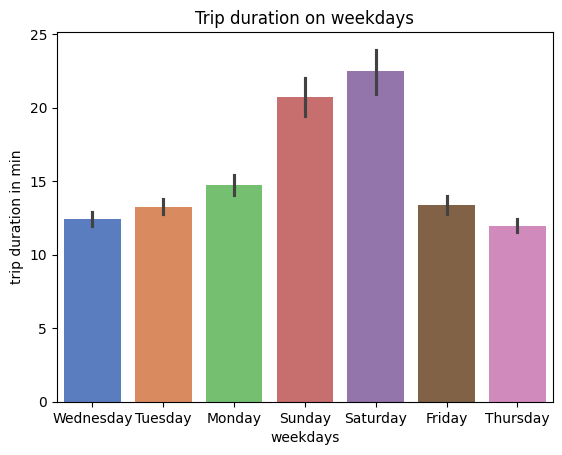

In [51]:
# trip duration v/s weekdays

sb.barplot(data=data_frame, y='duration_min', x='day_of_week', palette='muted')
plt.xlabel('weekdays')
plt.ylabel('trip duration in min')
plt.title('Trip duration on weekdays')
plt.show()

#### Observation

* Weekend :  The average trip durations are significantly higher in weekends (saturday and sunday) compared to weekdays
* Longest trips :  sunday has the longest trip duration followed by saturday.
* Shortest trips :  Thursday tend to have the shortest average trip duration.
* Mid-week consistency :  Monday, Tuesday, Wednesday and friday shows relatively similar average trip duration in the lower to mid range.
* variability on weekends :  The wider confidence intervals on sunday and saturday suggest more variability in trip duration on these days, means                                      there's   a large spread in how long people use the service in weekends.

* ## **weekly usage b/w customer and subscriber**

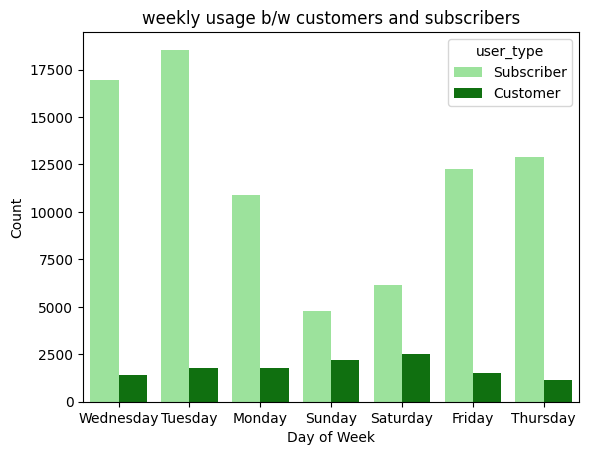

In [52]:
# lets see weekly usage b/w customers and subscribers

sb.countplot(data=data_frame, x='day_of_week', hue='user_type', palette=['lightgreen', 'green']);
plt.xlabel('Day of Week');
plt.ylabel('Count');
plt.title('weekly usage b/w customers and subscribers')
plt.show()

#### Observation

This plot explains that:
* Subscribers : Subscriber usage is consistenly high throughout the weekdays with count generally above 12,500 and peaking on tuesday around 17,500. The                 usage drops on the weekends with count falling to around 7500 and 5000 respectively.
* Customers :  customer usage is consierably lower than subscriber usage on all days of the week.
                customer usage shows a slight increase on weekends with counts reaching around 2500, compared to weekdays where counts fluctuate between                1000 and 2000.
* The plot highlights clear difference in weekly usage patterns between subscribers and customers, with subscribers driving weekdays usage and customers showing higher usage on weekends.  

* ## **Daily usage b/w customer and subscriber**

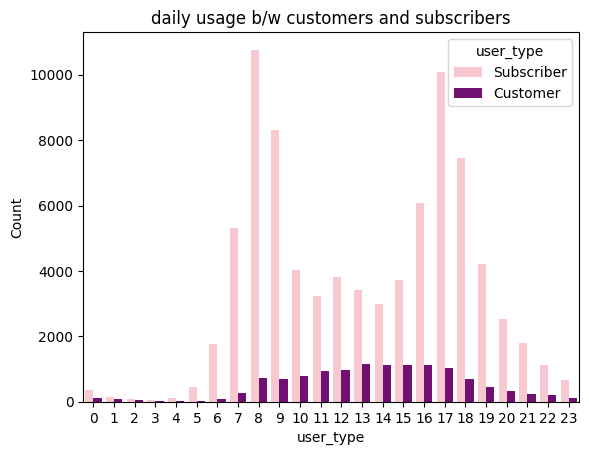

In [53]:
# Now lets see daily use of bike between customers and subscribers

sb.countplot(data=data_frame, x='start_hour', hue='user_type', palette=['pink', 'purple']);
plt.xlabel('user_type');
plt.ylabel('Count');
plt.title('daily usage b/w customers and subscribers')
plt.show()

#### Observation

* Subscriber (light pink) :
   * subscriber usage shows two distinct peaks, corresponding to typical commute times:  MORNING PEAK around 8AM TO 9AM and an EVENING PEAK around 5PM        TO 6PM, these peaks are significantly higher than usage during other hours.
   * subscriber usage is generally low during the late night and early moring hour.
* customer (dark purple) :
   * customer usage is generally much lower than subscriber usage throughout the day.
   * customer  usage shows a more gradual increase starting in late morning and peaking in the afternoon, around 12PM TO 4PM
* This plot provides a clear picture if the daily usage pattern for both subscriber and customers, revealing strong influence of commuting on subscriber   behaviour and a more spread out , mid day peak for customer usage.
  

# **4.2 - Multivariate Exploration**

Multivariate exploration means exploring relationship bewtween two or more variables together.


* ## **Relationship between user_type and gender**

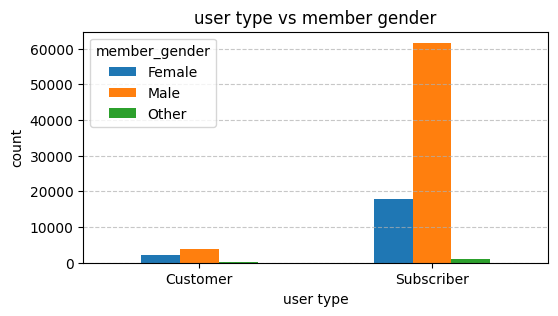

In [54]:
data_frame.groupby(['user_type', 'member_gender']).size().unstack().plot(kind='bar', figsize=(6, 3))
plt.title('user type vs member gender')
plt.xlabel('user type')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle= '--', alpha=0.7)
plt.show()

#### Observation

* Subscriber dominate the user base :    The subscriber bar is significantly taller than the customer bar across all gender categories.
* Gender distribution within subscribers :  among subscribers, Male is the most frequent gender, followed by Female and then other having a much smaller
                                            representation.
* Gender distribution within customers :  For all customers the number are much lower overall. while male still appears to be most frequent. other                                                 gender category has a relatively small number of individuals in both customer and subscriber.
* The graph highlights that the user base is heavily skewed towords susbcribers and with within groups there is a notable dominance of male member. 
   

* ## **Correlation Heatmap visualization**

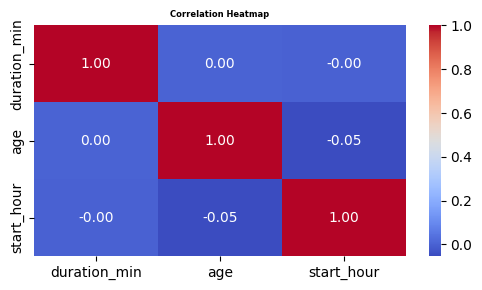

In [55]:
# Correlation Heatmap visualization code
# Selecting only numeric columns for correlation
numeric_cols = data_frame[['duration_min', 'age', 'start_hour']]
corr_matrix = numeric_cols.corr()
plt.figure(figsize=(6, 3))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')   
plt.title('Correlation Heatmap', fontweight = 'bold', fontsize = 6)
plt.show()

#### Observation

A correlation heatmap is chosen to visualize the strength and direction of linear relationships between multiple numerical variables.
* duration_min vs age: Weak positive correlation — older users don’t take significantly longer or shorter trips.
* duration_min vs start_hour: Near-zero correlation — trip duration doesn’t vary meaningfully with the hour of the day.
* age vs start_hour: Slight negative correlation — older users slightly tend to avoid peak trip hours, but it's very minimal.

This heatmap provides a quick overview of the linear relationships between these three numerical features
in dataset. it seems that for these particular variables, there aren't any strong dependencies.


* ## **Pair plot visualization for various numerical features**

<Figure size 1000x500 with 0 Axes>

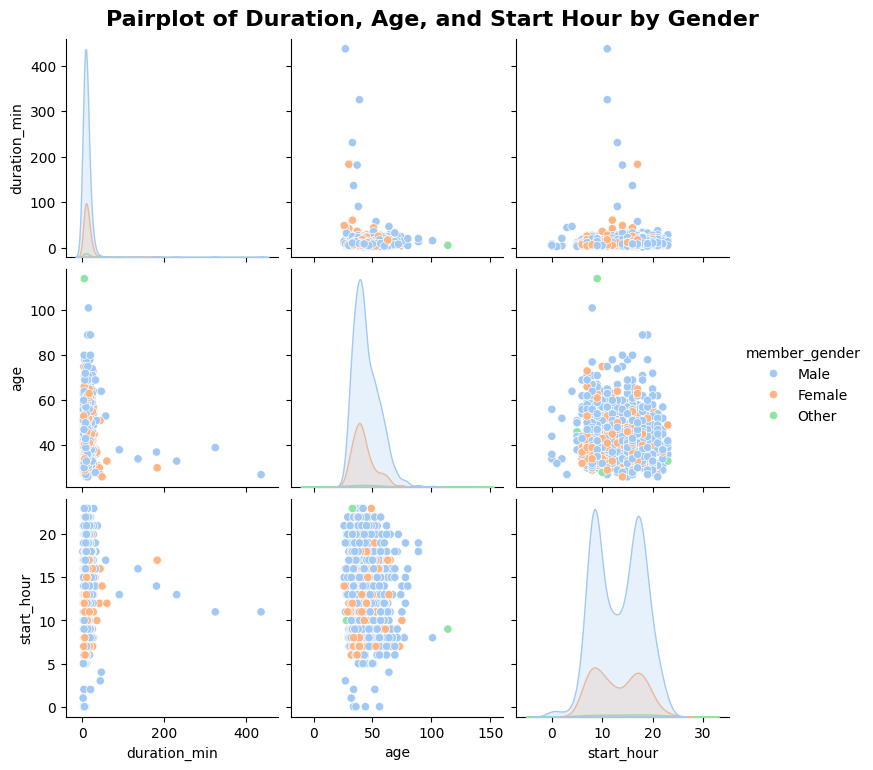

In [65]:
# Pair Plot visualization code
# Sample the dataset to keep the pairplot fast and readable
data_frame = data_frame[['duration_min', 'age', 'start_hour', 'member_gender']].dropna().sample(1000, random_state=42)
# Set figure size
plt.figure(figsize=(10, 5))
# Convert gender to categorical for coloring
sb.pairplot(data_frame, hue='member_gender', diag_kind='kde', palette='pastel')
# Add title
plt.suptitle('Pairplot of Duration, Age, and Start Hour by Gender', y=1.02, fontweight = 'bold', fontsize = 16)
# Show plot
plt.show()


#### Observation

A pairplot is ideal when exploring pairwise relationships between multiple numerical features, especially when segmented by a categorical feature like gender.
* Trip Duration vs Age :  Both males and females show a wide spread across age groups for trip durations, but no visible strong trend — suggesting duration is not strongly age-dependent.
* Start Hour vs Age :  No clear pattern, indicating trip start times are spread fairly evenly across age groups.
* Duration vs Start Hour  : There’s a slight concentration of shorter trips during peak hours for both genders, but not significantly different between them.

* Distribution Differences :  The distribution of age and start hour is fairly consistent across genders, but trip duration appears slightly more varied for males.

## **Solution to Business Objective**

1. **Focus on Subscriber Retention & Growth :**

Since Subscribers form the majority of the user base, and they consistently show higher ride frequency and shorter trip durations (indicating utility usage), prioritize:

 * Retention strategies: Loyalty programs, renewal discounts, referral incentives.
 * Conversion of casual customers to subscribers through trial passes and promotions.

2. **Optimize Bike Availability by Time and Location :**

The analysis showed peak usage during morning and evening commute hours and specific high-traffic stations. Use this to:

 * Strategically rebalance bikes across top start/end stations.
 * Implement dynamic reallocation schedules aligned with hourly usage trends.

3. **Improve Trip Experience Through App Features :**

Since trip durations are generally short and predictable:

 * Use in-app tools to recommend start/end stations based on user location and availability.
 * Provide real-time updates on station capacity to avoid frustration and missed trips.

4. **Seasonal Promotions and Off-Peak Incentives :**

Usage is lower in certain months or non-peak hours:

 * Introduce seasonal offers or “Happy Hour” discounts to encourage off-peak usage.
 * Partner with local events or businesses to bundle ride offers during less busy times.
   




## **Conclusion**
In this project, we explored and analyzed the Ford GOBike system dataset with the goal of undersatnding the user behavior, trip duartion
patterns, and riding habits based on different attributes such as user type, age and ride start time etc.

key observations  for this project are:
* Trip Timing  : most trips happen during morning( 7-9 am) and evening (4-6 pm).
* User type :  the majority of user type were made by subscriber and customers.
* Age distribution : most riders are young adult, paticularly between the ages of 20 to 40 years. very few riders are older.
* Days of the week  :  weekdays shows a higher number of trips comapered to weekends.
* correlation analysis  :  Age and trip duration shows little to no strong correlation and start hour is weakly related to duartion, indicates that time                           of day may slightly influence how long a ride takes.

The ford gobike service is primarily used for daily commuting by young working professionals.

There is a clear opportunity to target weekend leisure riders and old age groups through promotions or special events.

Maintaining bike availability during peak commuting hours should be a top operational priority for maximum
